In [2]:
zip_path = '/content/drive/My\ Drive/Colab_Test/Dataset/6.\ Deep\ Learning/santa-dataset.zip'
!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

!rm /content/santa-dataset.zip

#OOP Import

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf, random

#Function

In [ ]:
def evaluate_accuracy(history):
  history_dataframe = pd.DataFrame(history.history)

  max_acc_index = history_dataframe[history_dataframe['accuracy']==max(history_dataframe['accuracy'])].index.values
  max_acc = history_dataframe.loc[max_acc_index]['accuracy']
  max_val_acc_index = history_dataframe[history_dataframe['val_accuracy']==max(history_dataframe['val_accuracy'])].index.values
  max_val_acc = history_dataframe.loc[max_val_acc_index]['val_accuracy']

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.plot(max_acc_index, max_acc, 'o', c='k', ms=4, label='max accuracy')
  plt.plot(max_val_acc_index, max_val_acc, 'o', c='k', ms=4, label='max val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

  print("Maximum accuracy :", max_acc)
  print("---------------------------------------")
  print("Minimun validation accuracy :", max_val_acc)

In [ ]:
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

#Deeper Model (SGD)

In [ ]:
reset_random_seeds()
model_deeper = Sequential()

model_deeper.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model_deeper.add(MaxPooling2D((2, 2)))
model_deeper.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_deeper.add(MaxPooling2D((2, 2)))
model_deeper.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_deeper.add(MaxPooling2D((2, 2)))

model_deeper.add(Flatten())

model_deeper.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_deeper.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate=0.001, momentum=0.9)

model_deeper.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model_deeper.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 98, 98, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 67712)            

In [ ]:
reset_random_seeds()
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
reset_random_seeds()
history_deeper_model = model_deeper.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=50)

Epoch 1/50
6/6 [==============================] - 16s 3s/step - loss: 0.7042 - accuracy: 0.5272 - val_loss: 0.6933 - val_accuracy: 0.5885
Epoch 2/50
6/6 [==============================] - 15s 3s/step - loss: 0.6639 - accuracy: 0.5710 - val_loss: 0.7919 - val_accuracy: 0.4962
Epoch 3/50
6/6 [==============================] - 13s 2s/step - loss: 0.7011 - accuracy: 0.5665 - val_loss: 0.7043 - val_accuracy: 0.4962
Epoch 4/50
6/6 [==============================] - 17s 3s/step - loss: 0.6176 - accuracy: 0.6208 - val_loss: 0.5612 - val_accuracy: 0.6692
Epoch 5/50
6/6 [==============================] - 16s 3s/step - loss: 0.5513 - accuracy: 0.6843 - val_loss: 0.5456 - val_accuracy: 0.7923
Epoch 6/50
6/6 [==============================] - 14s 2s/step - loss: 0.4752 - accuracy: 0.7991 - val_loss: 0.5466 - val_accuracy: 0.7231
Epoch 7/50
6/6 [==============================] - 15s 2s/step - loss: 0.4680 - accuracy: 0.7644 - val_loss: 0.4710 - val_accuracy: 0.8346
Epoch 8/50
6/6 [==================

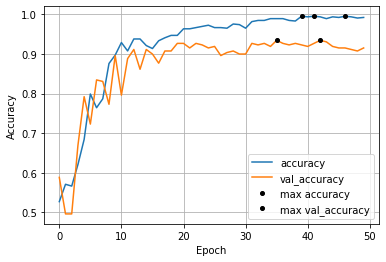

Maximum accuracy : 39    0.995468
41    0.995468
46    0.995468
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 35    0.934615
42    0.934615
Name: val_accuracy, dtype: float64


In [ ]:
evaluate_accuracy(history_deeper_model)

#Kesimpulan :

**Dengan menggunakan Deeper Model (VGG3) didapatkan nilai Validation Accuracy 0.9346 dan Validation Loss 0.2554 pada epoch 36.**

#Fine Tuning - VGG16 (SGD)

In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Dropout
reset_random_seeds()

vgg_conv = vgg16.VGG16(weights='imagenet', include_top = False, input_shape=(200, 200, 3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

fine_tuned_model = Sequential()

fine_tuned_model.add(vgg_conv)

fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(1024, activation='relu'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(1, activation='sigmoid'))

fine_tuned_model.summary()

opt = SGD(lr = 0.001, momentum=0.9)

fine_tuned_model.compile(optimizer=opt, loss='binary_crossentropy', metrics =['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              18875392  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1025      
Total params: 33,591,105
Trainable params: 18,876,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

reset_random_seeds()
aug_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
train_iterator_aug = aug_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
reset_random_seeds()

history_model_augmented = fine_tuned_model.fit_generator(train_iterator_aug, steps_per_epoch=len(train_iterator_aug), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=80)

Epoch 1/80
6/6 [==============================] - 23s 4s/step - loss: 0.6854 - accuracy: 0.5952 - val_loss: 0.5099 - val_accuracy: 0.8385
Epoch 2/80
6/6 [==============================] - 22s 4s/step - loss: 0.5156 - accuracy: 0.7281 - val_loss: 0.3638 - val_accuracy: 0.9115
Epoch 3/80
6/6 [==============================] - 21s 4s/step - loss: 0.3621 - accuracy: 0.8701 - val_loss: 0.2784 - val_accuracy: 0.9269
Epoch 4/80
6/6 [==============================] - 24s 4s/step - loss: 0.2818 - accuracy: 0.8912 - val_loss: 0.2389 - val_accuracy: 0.9346
Epoch 5/80
6/6 [==============================] - 24s 4s/step - loss: 0.2689 - accuracy: 0.9048 - val_loss: 0.2131 - val_accuracy: 0.9269
Epoch 6/80
6/6 [==============================] - 21s 3s/step - loss: 0.2194 - accuracy: 0.9139 - val_loss: 0.2039 - val_accuracy: 0.9346
Epoch 7/80
6/6 [==============================] - 21s 3s/step - loss: 0.2063 - accuracy: 0.9335 - val_loss: 0.1892 - val_accuracy: 0.9423
Epoch 8/80
6/6 [==================

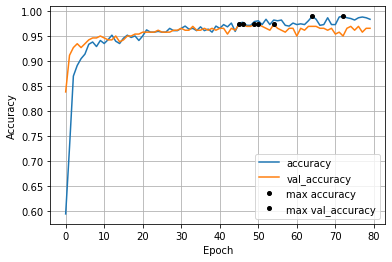

Maximum accuracy : 64    0.989426
72    0.989426
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 45    0.973077
46    0.973077
49    0.973077
50    0.973077
54    0.973077
Name: val_accuracy, dtype: float64


In [ ]:
evaluate_accuracy(history_model_augmented)

In [ ]:
fine_tuned_model.save("model.h5")
print("Saved model to disk")
# print(fine_tuned_model)

Saved model to disk


#Kesimpulan :

**Dengan menggunakan VGG16 pada dataset santa, didapatkan nilai yang lebih akurat namun lebih kompleks tetapi hasilnya lebih maksimal, yaitu dengan Validation Accuracy 0.9731 dan Validation Loss 0.1240 pada epochs 51.**

#Fine Tuning - VGG19 (SGD)

In [ ]:
from tensorflow.keras.applications import vgg19
from tensorflow.keras.layers import Dropout
reset_random_seeds()

vgg_conv = vgg19.VGG19(weights='imagenet', include_top = False, input_shape=(200, 200, 3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

fine_tuned_model = Sequential()

fine_tuned_model.add(vgg_conv)

fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(1024, activation='relu'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(1, activation='sigmoid'))

fine_tuned_model.summary()

opt = SGD(lr = 0.001, momentum=0.9)

fine_tuned_model.compile(optimizer=opt, loss='binary_crossentropy', metrics =['accuracy'])

80142336/80134624 [==============================] - 1s 0us/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 6, 6, 512)         20024384  
_________________________________________________________________
flatten_6 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              18875392  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 1025      
Total params: 38,900,801
Trainable params: 18,876,417
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
reset_random_seeds()
aug_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
train_iterator_aug = aug_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
reset_random_seeds()
history_model_augmented = fine_tuned_model.fit_generator(train_iterator_aug, steps_per_epoch=len(train_iterator_aug), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=50)

Epoch 1/50
6/6 [==============================] - 21s 4s/step - loss: 0.8500 - accuracy: 0.5514 - val_loss: 0.9230 - val_accuracy: 0.5000
Epoch 2/50
6/6 [==============================] - 20s 3s/step - loss: 0.6853 - accuracy: 0.6269 - val_loss: 0.4209 - val_accuracy: 0.8615
Epoch 3/50
6/6 [==============================] - 19s 3s/step - loss: 0.4508 - accuracy: 0.7900 - val_loss: 0.3659 - val_accuracy: 0.8500
Epoch 4/50
6/6 [==============================] - 22s 4s/step - loss: 0.3506 - accuracy: 0.8625 - val_loss: 0.3031 - val_accuracy: 0.9115
Epoch 5/50
6/6 [==============================] - 22s 4s/step - loss: 0.3181 - accuracy: 0.8716 - val_loss: 0.2655 - val_accuracy: 0.9308
Epoch 6/50
6/6 [==============================] - 19s 3s/step - loss: 0.2997 - accuracy: 0.8792 - val_loss: 0.2716 - val_accuracy: 0.9000
Epoch 7/50
6/6 [==============================] - 19s 3s/step - loss: 0.2535 - accuracy: 0.9079 - val_loss: 0.2409 - val_accuracy: 0.9154
Epoch 8/50
6/6 [==================

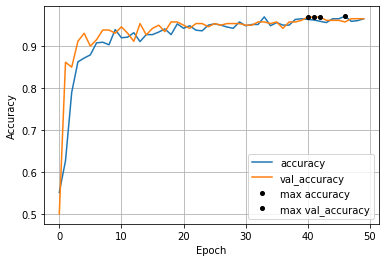

Maximum accuracy : 46    0.971299
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 40    0.969231
41    0.969231
42    0.969231
Name: val_accuracy, dtype: float64


In [ ]:
evaluate_accuracy(history_model_augmented)

#Kesimpulan : 

**Dengan menggunakan VGG19 pada dataset santa, didapatkan nilai yang lebih akurat namun sangat kompleks tetapi hasilnya belum tentu lebih maksimal dibandingkan dengan yang tidak terlalu kompleks, yaitu dengan Validation Accuracy 0.9692 dan Validation Loss 0.1346 pada epochs 43.**



#Deeper Model (Adam)

In [ ]:
reset_random_seeds()
model_deeper = Sequential()

model_deeper.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model_deeper.add(MaxPooling2D((2, 2)))
model_deeper.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_deeper.add(MaxPooling2D((2, 2)))
model_deeper.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_deeper.add(MaxPooling2D((2, 2)))

model_deeper.add(Flatten())

model_deeper.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_deeper.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.001)

model_deeper.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model_deeper.summary()



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 98, 98, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 67712)            

In [ ]:
reset_random_seeds()
aug_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
train_iterator_aug = aug_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
reset_random_seeds()
history_deeper_model = model_deeper.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=50)

Epoch 1/50
6/6 [==============================] - 16s 3s/step - loss: 7.3448 - accuracy: 0.4713 - val_loss: 2.5004 - val_accuracy: 0.5000
Epoch 2/50
6/6 [==============================] - 15s 2s/step - loss: 0.9691 - accuracy: 0.6269 - val_loss: 0.6500 - val_accuracy: 0.6423
Epoch 3/50
6/6 [==============================] - 13s 2s/step - loss: 0.4793 - accuracy: 0.7221 - val_loss: 0.4099 - val_accuracy: 0.8385
Epoch 4/50
6/6 [==============================] - 17s 3s/step - loss: 0.3017 - accuracy: 0.8867 - val_loss: 0.4029 - val_accuracy: 0.8769
Epoch 5/50
6/6 [==============================] - 16s 3s/step - loss: 0.2127 - accuracy: 0.9199 - val_loss: 0.3872 - val_accuracy: 0.8846
Epoch 6/50
6/6 [==============================] - 14s 2s/step - loss: 0.1384 - accuracy: 0.9532 - val_loss: 0.4078 - val_accuracy: 0.8846
Epoch 7/50
6/6 [==============================] - 15s 2s/step - loss: 0.0708 - accuracy: 0.9789 - val_loss: 0.3928 - val_accuracy: 0.8885
Epoch 8/50
6/6 [==================

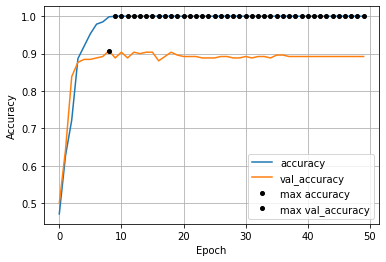

Maximum accuracy : 9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 8    0.907692
Name: val_accuracy, dtype: float64


In [ ]:
evaluate_accuracy(history_deeper_model)

#Kesimpulan : 

**Dengan menggunakan Deeper Model (VGG3) dengan optimizer Adam didapatkan nilai Validation Accuracy 0.4368 dan Validation Loss 0.9077 pada epoch 9.**


#Fine Tuning - VGG16 (Adam)

In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Dropout
reset_random_seeds()

vgg_conv = vgg16.VGG16(weights='imagenet', include_top = False, input_shape=(200, 200, 3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

fine_tuned_model = Sequential()

fine_tuned_model.add(vgg_conv)

fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(1024, activation='relu'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(1, activation='sigmoid'))

fine_tuned_model.summary()

opt = Adam(lr = 0.001)

fine_tuned_model.compile(optimizer=opt, loss='binary_crossentropy', metrics =['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              18875392  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 1025      
Total params: 33,591,105
Trainable params: 18,876,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
reset_random_seeds()
aug_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
train_iterator_aug = aug_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
reset_random_seeds()
history_model_augmented = fine_tuned_model.fit_generator(train_iterator_aug, steps_per_epoch=len(train_iterator_aug), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=50)

Epoch 1/50
6/6 [==============================] - 21s 3s/step - loss: 5.5176 - accuracy: 0.4834 - val_loss: 0.2097 - val_accuracy: 0.9231
Epoch 2/50
6/6 [==============================] - 20s 3s/step - loss: 0.5506 - accuracy: 0.8006 - val_loss: 0.2580 - val_accuracy: 0.9231
Epoch 3/50
6/6 [==============================] - 19s 3s/step - loss: 0.3707 - accuracy: 0.8731 - val_loss: 0.2325 - val_accuracy: 0.9308
Epoch 4/50
6/6 [==============================] - 22s 4s/step - loss: 0.2530 - accuracy: 0.9305 - val_loss: 0.2105 - val_accuracy: 0.9385
Epoch 5/50
6/6 [==============================] - 22s 4s/step - loss: 0.2114 - accuracy: 0.9215 - val_loss: 0.1857 - val_accuracy: 0.9500
Epoch 6/50
6/6 [==============================] - 19s 3s/step - loss: 0.1406 - accuracy: 0.9426 - val_loss: 0.1798 - val_accuracy: 0.9500
Epoch 7/50
6/6 [==============================] - 19s 3s/step - loss: 0.1043 - accuracy: 0.9592 - val_loss: 0.1613 - val_accuracy: 0.9654
Epoch 8/50
6/6 [==================

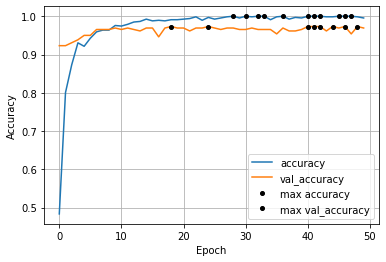

Maximum accuracy : 28    1.0
30    1.0
32    1.0
33    1.0
36    1.0
40    1.0
41    1.0
42    1.0
45    1.0
46    1.0
47    1.0
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 18    0.973077
24    0.973077
40    0.973077
41    0.973077
42    0.973077
44    0.973077
46    0.973077
48    0.973077
Name: val_accuracy, dtype: float64


In [ ]:
evaluate_accuracy(history_model_augmented)

#Kesimpulan : 

**Dengan menggunakan VGG16 pada dataset santa dengan menggunakan optimizer Adam, didapatkan nilai yang lebih akurat namun lebih kompleks tetapi hasilnya lebih maksimal, yaitu dengan Validation Accuracy 0.9731dan Validation Loss 0.1455 pada epoch 49.**


#Fine Tuning - VGG19 (Adam)

In [ ]:
from tensorflow.keras.applications import vgg19
from tensorflow.keras.layers import Dropout
reset_random_seeds()

vgg_conv = vgg19.VGG19(weights='imagenet', include_top = False, input_shape=(200, 200, 3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

fine_tuned_model = Sequential()

fine_tuned_model.add(vgg_conv)

fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(1024, activation='relu'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(1, activation='sigmoid'))

fine_tuned_model.summary()

opt = Adam(lr = 0.001)

fine_tuned_model.compile(optimizer=opt, loss='binary_crossentropy', metrics =['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 6, 6, 512)         20024384  
_________________________________________________________________
flatten_9 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              18875392  
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 1025      
Total params: 38,900,801
Trainable params: 18,876,417
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
reset_random_seeds()
aug_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
train_iterator_aug = aug_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
reset_random_seeds()
history_model_augmented = fine_tuned_model.fit_generator(train_iterator_aug, steps_per_epoch=len(train_iterator_aug), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=50)

Epoch 1/50
6/6 [==============================] - 21s 4s/step - loss: 4.4988 - accuracy: 0.5906 - val_loss: 0.2669 - val_accuracy: 0.8846
Epoch 2/50
6/6 [==============================] - 20s 3s/step - loss: 0.6227 - accuracy: 0.8006 - val_loss: 0.3563 - val_accuracy: 0.9000
Epoch 3/50
6/6 [==============================] - 20s 3s/step - loss: 0.2743 - accuracy: 0.9109 - val_loss: 0.2225 - val_accuracy: 0.9423
Epoch 4/50
6/6 [==============================] - 22s 4s/step - loss: 0.2692 - accuracy: 0.9109 - val_loss: 0.2167 - val_accuracy: 0.9385
Epoch 5/50
6/6 [==============================] - 22s 4s/step - loss: 0.1823 - accuracy: 0.9335 - val_loss: 0.1875 - val_accuracy: 0.9500
Epoch 6/50
6/6 [==============================] - 19s 3s/step - loss: 0.1622 - accuracy: 0.9471 - val_loss: 0.1679 - val_accuracy: 0.9538
Epoch 7/50
6/6 [==============================] - 19s 3s/step - loss: 0.1053 - accuracy: 0.9622 - val_loss: 0.1508 - val_accuracy: 0.9577
Epoch 8/50
6/6 [==================

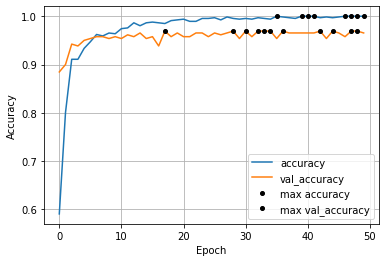

Maximum accuracy : 35    1.0
39    1.0
40    1.0
41    1.0
46    1.0
47    1.0
48    1.0
49    1.0
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 17    0.969231
28    0.969231
30    0.969231
32    0.969231
33    0.969231
34    0.969231
36    0.969231
42    0.969231
44    0.969231
47    0.969231
48    0.969231
Name: val_accuracy, dtype: float64


In [ ]:
evaluate_accuracy(history_model_augmented)

#Kesimpulan : 

**Dengan menggunakan VGG19 pada dataset santa dengan optimizer Adam, didapatkan nilai yang lebih akurat namun sangat kompleks tetapi hasilnya belum tentu lebih maksimal dibandingkan dengan yang tidak terlalu kompleks, yaitu dengan Validation Accuracy 0.9692 dan Validation Loss 0.1551 pada epochs 49.**




#**Sehingga dapat disimpulkan, pada kasus ini optimizer SGD lebih baik dibandingkan dengan optimizer Adam dan belum tentu sama disaat menggunakan dataset lain**